### Временные ряды. Модель ARIMA

In [1]:
import numpy as np
import pandas as pd
import itertools
from datetime import datetime
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Работаем с моделью $ARIMA(p,k,q)$

* $AR(p)$ $-$ модель авторегрессии, которая предсказывает текущее (будущее) значение временного ряда на основе $p$ его предыдущих значений
* $MA(q)$ $-$ модель скользящего среднего, которая предсказывает текущее (будущее) значение временного ряда на основе $q$ ошибок предыдущих прогнозов
* $ARMA(p,q)$ $-$ модель авторегрессии со скользящим средним
* $ARIMA(p,k,q)$ $-$ модель авторегрессии со скользящим средним и с порядком дифференцирования ряда $k$

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Имеется нестационарный временной ряд из данных, представляющих из себя рентабельность активов (в %) российских предприятий в среднем по годам (с 1995 г), взятых из Росстат-а.

In [3]:
timeseries = pd.read_csv('activ.csv', header=0,delimiter=';')
timeseries['Year'] = timeseries['Year'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y'))
timeseries.set_index(keys='Year', drop=True, inplace=True)
timeseries = timeseries.squeeze(axis=1)

Строится модель $ARIMA$ с параметрами $(p,k,q)$. При $k=0$ имеем модель $ARMA(p,k)$, но, так как наш временной ряд нестационарен (имеются тренды и сезонность), то необходимо, чтобы $k>0$.

In [4]:
model = ARIMA(timeseries, order=(10, 2, 10)) 
result = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespac

Предсказывание вплоть до 2030-го года.

In [5]:
pred = result.get_prediction(start='1995-01-01', end='2030-01-01', dynamic=False)
pred_ci = pred.conf_int()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


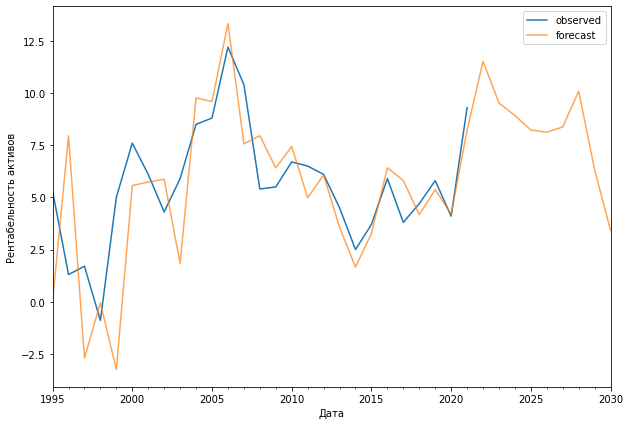

In [6]:
ax = timeseries['1995':].plot(label='observed', figsize=(10, 7)) # реальные наблюдению
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7) # прогноз
#ax.fill_between(pred_ci.index,
#pred_ci.iloc[:, 0]),
#pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Дата')
ax.set_ylabel('Рентабельность активов')
plt.legend()
plt.show()

Важно понимать, что эта модель включает в себя случайности, поэтому можно "верить" в форму прогнозируемого случайного процесса, но за конкретные точки модель, аналитик не могут нести никакой ответсвенности (вероятность, что именно такие точки и будут - явно не 100%). Также любые реальные данные прошлых лет "отрабатывают" историю нашей страны - было множество нестационарных случаев - поэтому этот ряд впринципе нестационарен, как уже отмечено выше, но он может быть похож (или аппроксимирован с помощью дифференцирования) на стационарный. Эта модель, разумеется, ничего, кроме данных, не имеет - настоящее экспертное прогнозирование (экономико-социально-политическое) использует намного больше информации (фундаментальный анализ).
